In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Чтение и проверка исходных распределений

In [2]:
b_df = pd.read_csv("background_b.csv")
nob_df = pd.read_csv("background_-b.csv")

In [3]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   edep    96 non-null     float64
 1   pdf     96 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
nob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   edep    95 non-null     float64
 1   pdf     95 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


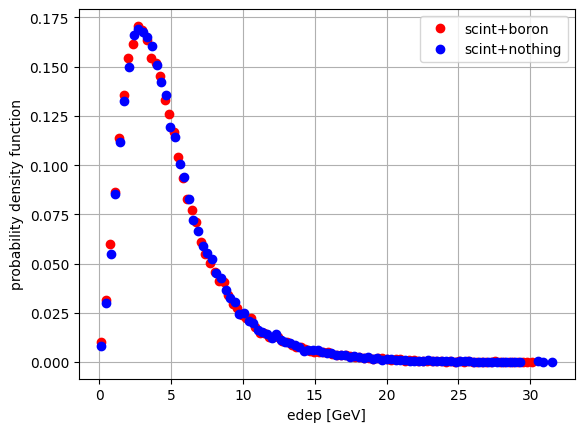

In [5]:
ax = plt.plot(b_df['edep'].tolist(), b_df['pdf'].tolist(), 'ro', label='scint+boron')
plt.plot(nob_df['edep'].tolist(), nob_df['pdf'].tolist(), 'bo', label='scint+nothing')
plt.xlabel('edep [GeV]')
plt.ylabel('probability density function')
plt.legend()
plt.grid();

## Строим кумулятивную функцию

In [6]:
edep_b = b_df['edep'].tolist()
pdf_b = b_df['pdf'].tolist()
edep_nob = nob_df['edep'].tolist()
pdf_nob = nob_df['pdf'].tolist()

edep_pdf_b = []
edep_pdf_nob = []

for i in range(len(edep_b)):
    edep_pdf_b.append((edep_b[i], pdf_b[i]))
    

for i in range(len(edep_nob)):
    edep_pdf_nob.append((edep_nob[i], pdf_nob[i]))

In [7]:
def lcheck(index, params):
    seq, x = params
    return seq[index][0] >= x

def lbinsearch(l, r, ckeck, checkparams):
    while l < r:
        m = (l + r) // 2
        if ckeck(m, checkparams):
            r = m
        else:
            l = m + 1
    return l

def rcheck(index, params):
    seq, x = params
    return seq[index][0] <= x

def rbinsearch(l, r, check, checkparams):
    while l < r:
        m = (l + r + 1) // 2
        if check(m, checkparams):
            l = m
        else:
            r = m - 1
    return r

def func(x, f):
    lindex = lbinsearch(0, len(f) - 1, lcheck, (f, x))
    rindex = rbinsearch(0, len(f) - 1, rcheck, (f, x))
    
    y1 = f[lindex][1]
    y2 = f[rindex][1]
    x1 = f[lindex][0]
    x2 = f[rindex][0]
    if x1 == x2:
        return y1
    return y1 + (y2 - y1) * (x - x1) / (x2 - x1)

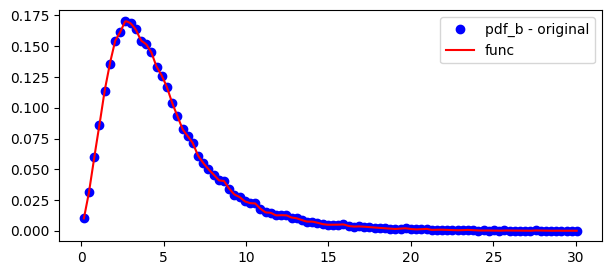

In [8]:
func_y = []
e_arr = []
ei = edep_b[0]
while ei < edep_b[-1]:
    func_y.append(func(ei, f=edep_pdf_b))
    e_arr.append(ei)
    ei += 0.1

plt.subplots(figsize=(7, 3))
plt.plot(edep_b, pdf_b, 'bo', label='pdf_b - original')
plt.plot(e_arr, func_y, color='red', label='func')
plt.legend();

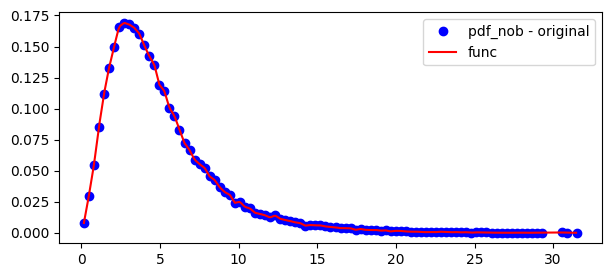

In [9]:
func_y = []
e_arr = []
ei = edep_nob[0]
while ei < edep_nob[-1]:
    func_y.append(func(ei, f=edep_pdf_nob))
    e_arr.append(ei)
    ei += 0.1

plt.subplots(figsize=(7, 3))
plt.plot(edep_nob, pdf_nob, 'bo', label='pdf_nob - original')
plt.plot(e_arr, func_y, color='red', label='func')
plt.legend();

In [10]:
def integral(a, b, f):
    n = 10000
    dx = (b - a) / n
    xi = a
    integral = 0
    
    for _ in range(n):
        integral += func(xi, f) * dx
        xi += dx
    
    return integral

In [11]:
round(integral(edep_b[0], edep_b[-1], f=edep_pdf_b), 5)

0.99837

In [12]:
round(integral(edep_nob[0], edep_nob[-1], f=edep_pdf_nob), 5)

0.99899

In [13]:
cumulative_b = []
#eps = edep_b[0] / 100000
a, b = 0., 0.
integral_b = 0.
for i in range(len(edep_b)):
    a, b = b, edep_b[i]# - eps
    integral_b += integral(a=a, b=b, f=edep_pdf_b)
    cumulative_b.append(integral_b)
    #eps = (b - a) / 100000

In [14]:
integral_b

0.9999447139249891

In [15]:
cumulative_b = (np.asanyarray(cumulative_b) / integral_b).tolist()

In [16]:
f_b = open('cumulative_func_b.txt', 'w')
for i in range(len(edep_b)):
    print(edep_b[i], cumulative_b[i])
    if i < len(edep_b) - 1:
        f_b.write(str(edep_b[i]) + ' ' + str(cumulative_b[i]) + '\n')
    else:
        f_b.write(str(edep_b[i]) + ' ' + str(cumulative_b[i]))
f_b.close()

0.1575 0.0015923972873962329
0.4725 0.00816968465534943
0.7875 0.022572798411647915
1.1025 0.04555406997579648
1.4175 0.07704148320213078
1.7325 0.11635499522340113
2.0475 0.16203002577406278
2.3625 0.21175414959870092
2.6775 0.2640788701058721
2.9925 0.31754003446456536
3.3075 0.3698971107885653
3.6225 0.4200377877970472
3.9375 0.4682898393788409
4.2525 0.5150295507502716
4.5675 0.5588725995023298
4.8825 0.5997468512932659
5.1975 0.6380205128280193
5.5125 0.6727973771358222
5.8275 0.7038933064958088
6.1425 0.7316203333481732
6.4575 0.7567626386332628
6.7725 0.7801125137738996
7.0875 0.800925829641746
7.4025 0.8191944431594714
7.7175 0.8357506249503946
8.0325 0.8508344356383
8.3475 0.8644938857312727
8.6625 0.8773290578385596
8.9775 0.8891000655299611
9.2925 0.8991346267655816
9.6075 0.908104873402356
9.9225 0.916202924621966
10.2375 0.9235167536292372
10.5525 0.9305745015248164
10.8675 0.9369201386134006
11.1825 0.9421054677990427
11.4975 0.9467786283601477
11.8125 0.9510677201947461


In [17]:
cumulative_nob = []
#eps = edep_nob[0] / 1000
a, b = 0., 0.
integral_nob = 0.
for i in range(len(edep_nob)):
    a, b = b, edep_nob[i]# - eps
    integral_nob += integral(a=a, b=b, f=edep_pdf_nob)
    cumulative_nob.append(integral_nob)
    #eps = (b - a) / 1000

In [18]:
integral_nob

1.0002397710312483

In [19]:
cumulative_nob = (np.asanyarray(cumulative_nob) / integral_nob).tolist()

In [20]:
f_nob = open('cumulative_func_-b.txt', 'w')
for i in range(len(edep_nob)):
    print(edep_nob[i], cumulative_nob[i])
    if i < len(edep_nob) - 1:
        f_nob.write(str(edep_nob[i]) + ' ' + str(cumulative_nob[i]) + '\n')
    else:
        f_nob.write(str(edep_nob[i]) + ' ' + str(cumulative_nob[i]))
f_nob.close()

0.16 0.0012639401437680772
0.48 0.007335301138800099
0.8 0.02090226089967045
1.12 0.04334069271933838
1.44 0.0749146845171686
1.76 0.11404832693937188
2.08 0.15926984966423627
2.4 0.2097952390915116
2.72 0.26339257680257705
3.04 0.31728591634097825
3.36 0.3705394300910684
3.68 0.4226250958732698
4.0 0.47243090751444894
4.32 0.5193167640762688
4.64 0.5637227064336751
4.96 0.6044650344516681
5.28 0.6417993667763049
5.6 0.676141907677855
5.92 0.7073004759702023
6.24 0.7356432986175859
6.56 0.7604822829806881
6.88 0.7827053161587046
7.2 0.8027924798627473
7.52 0.821055663291622
7.84 0.8382548834264733
8.16 0.8538782390191977
8.48 0.8679336201539811
8.8 0.880589110553222
9.12 0.8916926386600539
9.44 0.9018281948537022
9.76 0.91059587503881
10.08 0.9184594815705593
10.4 0.9257951954916849
10.72 0.9322829079293886
11.04 0.9380106945832908
11.36 0.9430344644320172
11.68 0.9477302529211736
12.0 0.9519620822558974
12.32 0.9561778610294663
12.64 0.9602337149611978
12.96 0.9636975732315327
13.28 0

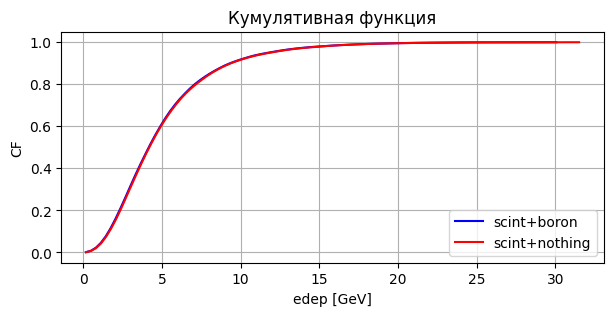

In [21]:
fig, ax = plt.subplots(figsize=(7, 3))
plt.plot(edep_b, cumulative_b, color='blue', label='scint+boron')
plt.plot(edep_nob, cumulative_nob, color='red', label='scint+nothing')
#plt.semilogy()
plt.legend();
plt.grid(True)

ax.set_title('Кумулятивная функция')
ax.set_xlabel('edep [GeV]')
ax.set_ylabel('CF');

## Тестирование кумулятивной функции

**Макрос для генерации случаных энергопотерь в детекторе от фоновых протонов**
```c++
TGraph* backgroundEnergyInvCDFGr = NULL;

Double_t backgroundEnergyInvCDF(Double_t *x, Double_t *par) {
  return backgroundEnergyInvCDFGr->Eval(x[0]);
}

auto fBackgroundEnergyInvCDF = new TF1("backgroundEnergyInvCDF", backgroundEnergyInvCDF, 0., 1., 0);

void ReadCFTXT(TString cumulative_func="") {
    std::ifstream fin(cumulative_func.Data());
    if (!fin.is_open()) {
        cerr << "Can't find " << cumulative_func << endl;
    }

    Int_t nPoints = std::count(std::istreambuf_iterator<char>(fin),
                               std::istreambuf_iterator<char>(), '\n');
    fin.seekg(0, std::ios::beg);

    TVectorD edep(nPoints + 2);
    TVectorD cf(nPoints + 2);
    Int_t i=0;

    while (!fin.eof()) {
        Double_t curEdep; // GeV
        Double_t curCF; 
        fin >> curEdep >> curCF;
        edep(i) = curEdep;
        cf(i) = curCF;
        if (fin.eof()) break;
        i++;
    }
    fin.close();

    backgroundEnergyInvCDFGr = new TGraph(cf, edep);
}

void test_background_sim(TString cumulative_func="cumulative_func_-b", Int_t nevents=10000)
{
	ReadCFTXT(cumulative_func + ".txt");

	auto rnd = new TRandom();

	//auto h = new TH1F("h", "h", 100, 1., -1.);

	std::ofstream fout(("test_" + cumulative_func + ".csv").Data());
	fout << "rnd_edep" << endl;
	for (UInt_t i=0; i<nevents; i++) {
		Double_t rnd_cf = rnd->Uniform();
		Double_t rnd_edep = fBackgroundEnergyInvCDF->Eval(rnd_cf);
		fout << rnd_edep << endl;
		//h->Fill(rnd_edep);
	}

	//h->Draw();
}
```

In [22]:
!ls test_background_sim.C
!root -l -q "test_background_sim.C(\"cumulative_func_b\", 10000)"
!root -l -q "test_background_sim.C(\"cumulative_func_-b\", 10000)"

test_background_sim.C

Processing test_background_sim.C("cumulative_func_b", 10000)...

Processing test_background_sim.C("cumulative_func_-b", 10000)...


In [23]:
b_rnd_edep_df = pd.read_csv('test_cumulative_func_b.csv')
nob_rnd_edep_df = pd.read_csv('test_cumulative_func_-b.csv')

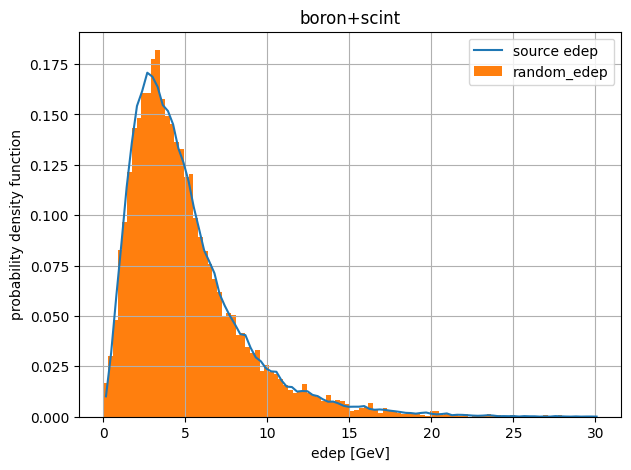

In [24]:
plt.figure(figsize=(7, 5))
plt.plot(edep_b, pdf_b, label='source edep')
b_rnd_edep_df['rnd_edep'].hist(bins=100, density=True, label='random_edep')
plt.xlabel('edep [GeV]')
plt.ylabel('probability density function')
plt.title('boron+scint')
plt.legend();

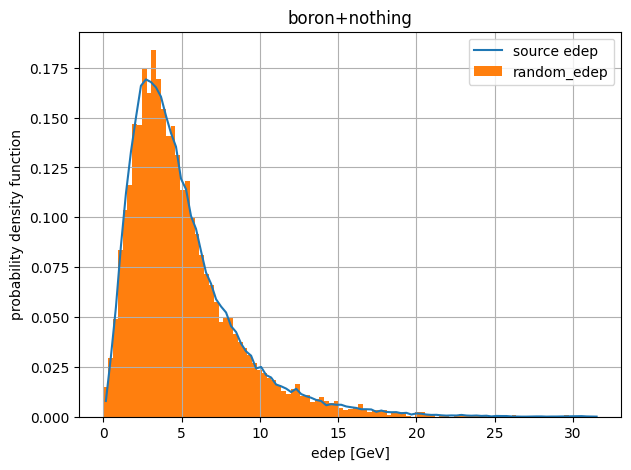

In [25]:
plt.figure(figsize=(7, 5))
plt.plot(edep_nob, pdf_nob, label='source edep')
nob_rnd_edep_df['rnd_edep'].hist(bins=100, density=True, label='random_edep')
plt.xlabel('edep [GeV]')
plt.ylabel('probability density function')
plt.title('boron+nothing')
plt.legend();

## Вывод

**Так как распределение случано разыгранных энергопотерь совпало с исходным распределением - мы корректно построили кумулятивные функции!** <br>